In [13]:

import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Supplier': ['A','A','A','B','B','B','C','C','C'],
    'DeliveryTime': [3,4,5,2,3,10,4,4,5]
}

df = pd.DataFrame(data)

print("Dataframe created successfully:")
display(df)

Dataframe created successfully:


,Supplier,DeliveryTime
0,A,3
1,A,4
2,A,5
3,B,2
4,B,3
5,B,10
6,C,4
7,C,4
8,C,5


In [14]:

print("--- Detailed Statistics ---")
stats = df.groupby('Supplier')['DeliveryTime'].agg(['mean', 'std', 'min', 'max'])
print(stats)


--- Detailed Statistics ---
              mean       std  min  max
Supplier                              
A         4.000000  1.000000    3    5
B         5.000000  4.358899    2   10
C         4.333333  0.577350    4    5


<Figure size 800x500 with 0 Axes>

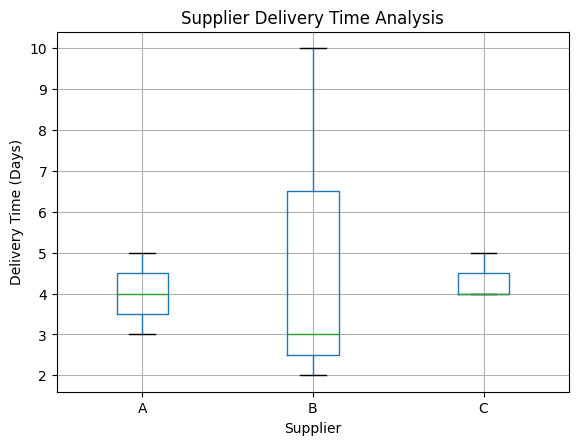

In [15]:
plt.figure(figsize=(8, 5))

df.boxplot(column='DeliveryTime', by='Supplier', grid=True)

plt.title("Supplier Delivery Time Analysis")
plt.suptitle("")
plt.xlabel("Supplier")
plt.ylabel("Delivery Time (Days)")

plt.show()

In [16]:
from PIL import Image, ImageEnhance, ImageFilter
import cv2
import numpy as np
import os

IMAGE_PATH = "rizwanG2.jpg"
WIDTH = 160
CONTRAST = 1.8
BRIGHTNESS = 1.1

ASCII_CHARS = ["@", "%", "#", "*", "+", "=", "-", ":", ".", " "]


def crop_face(path):
    if os.path.exists(path):
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        face_cascade = cv2.CascadeClassifier(
            cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
        )

        faces = face_cascade.detectMultiScale(
            gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100)
        )

        if len(faces) > 0:
            x, y, w, h = faces[0]
            face = img[y:y+h, x:x+w]
            return Image.fromarray(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        else:
            return Image.open(path)
    else:
        return None

def resize_image(image):
    if image is not None:
        w, h = image.size
        ratio = h / w
        height = int(WIDTH * ratio * 0.55)
        return image.resize((WIDTH, height))
    else:
        return None

def color_ascii(image):
    if image is None:
        return ""

    image = ImageEnhance.Contrast(image).enhance(CONTRAST)
    image = ImageEnhance.Brightness(image).enhance(BRIGHTNESS)
    image = image.filter(ImageFilter.SHARPEN)

    pixels = np.array(image)
    gray = image.convert("L")
    gray_pixels = np.array(gray)

    scale = (len(ASCII_CHARS) - 1) / 255
    ascii_art = ""

    for y in range(pixels.shape[0]):
        for x in range(pixels.shape[1]):
            r, g, b = pixels[y][x]
            char = ASCII_CHARS[int(gray_pixels[y][x] * scale)]
            ascii_art += f"\033[38;2;{r};{g};{b}m{char}\033[0m"
        ascii_art += "\n"

    return ascii_art

face_img = crop_face(IMAGE_PATH)

if face_img is not None:
    face_img = resize_image(face_img)

    if face_img is not None:
        ascii_image = color_ascii(face_img)
        print(ascii_image)

        with open("ascii_face_color.txt", "w", encoding="utf-8") as f:
            f.write(ascii_image)
    else:
        print("❌ Resize failed")
else:
    print("❌ Image not found or face not detected")


=+======+*%@@@@@%%@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#@@*=*#-.:*@@@@@%#%@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
++=:=--**%=#@@@@%%@@@@%%%%%%%@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
-.. .-==+*:*@@@@%@@@@@@@%%%#%#%%%@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@%%@@@@@@@@@@@@@@@
::.:...    .@@%%#%@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@%%%%%#*#@@@@@@%%%#**+***#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
=+::::=----#@@@#%%@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@%%@@#*+-::-::::::::::-----====****##%@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
::--===--:#@@@@#%%@@@@@@@%%@%@@@@@